<a href="https://colab.research.google.com/github/pavan097/Fashion-MNIST/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = tf.keras.datasets.fashion_mnist

In [0]:
(train_imgs,train_lbls), (test_imgs, test_lbls) = data.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [0]:
train_imgs.shape

(60000, 28, 28)

In [0]:
train_lbls.shape

(60000,)

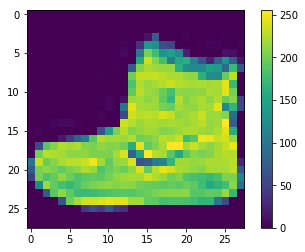

In [0]:
plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

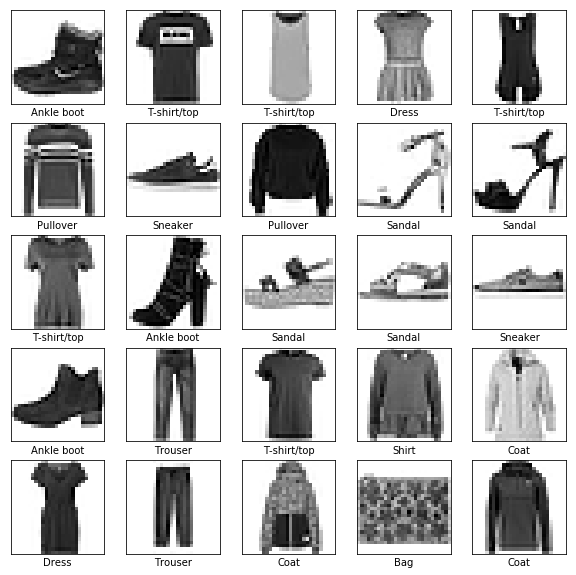

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_imgs[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_lbls[i]])
plt.show()

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:
model.fit(train_imgs, train_lbls, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5068 - acc: 0.8229
Epoch 2/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3787 - acc: 0.8638
Epoch 3/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3373 - acc: 0.8760
Epoch 4/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3124 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2939 - acc: 0.8914


In [0]:
test_loss, test_accur = model.evaluate(test_imgs, test_lbls)
test_accur

10000/10000 [==============================] - 0s 29us/sample - loss: 0.3790 - acc: 0.8637


0.8637

In [0]:
pred = model.predict(test_imgs)

In [0]:
pred[0]

array([5.2539093e-05, 5.4417097e-09, 2.3413725e-07, 3.4315214e-08,
       6.4038778e-07, 1.1911973e-02, 1.2091622e-05, 7.3328622e-02,
       7.3727657e-05, 9.1462016e-01], dtype=float32)

In [0]:
test_lbls[0]

9

In [0]:
np.argmax(pred[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


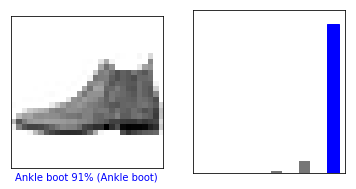

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_lbls, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_lbls)
plt.show()


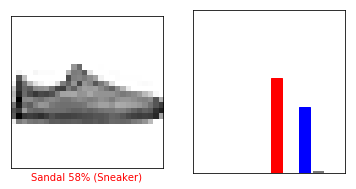

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_lbls, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_lbls)
plt.show()

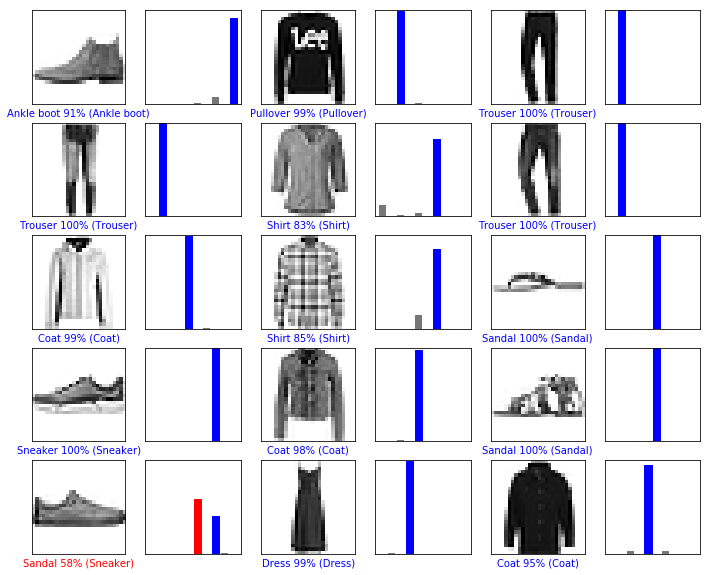

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_lbls, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_lbls)
plt.show()
